In [1]:
from NeuralNetwork import *
    # ANN, split_dataset
from Perceptron import Perceptron
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# innitialize the dataset for each gate

X_gate = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_gate = np.array([0, 0, 0, 1])
y_or_gate = np.array([0, 1, 1, 1])
y_xor_gate = np.array([0, 1, 1, 0])

In [3]:
# set up the perceptron

n_epochs = 10
learning_rate = 0.1

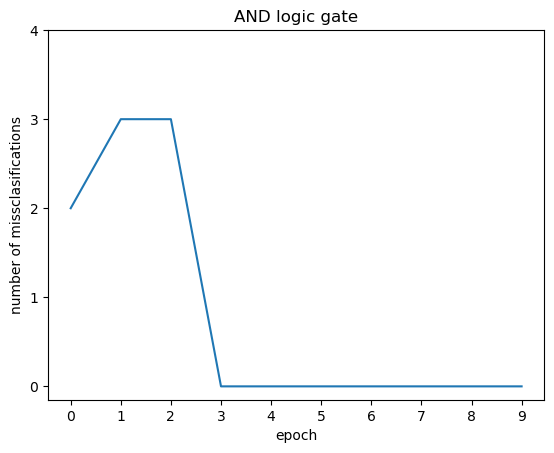

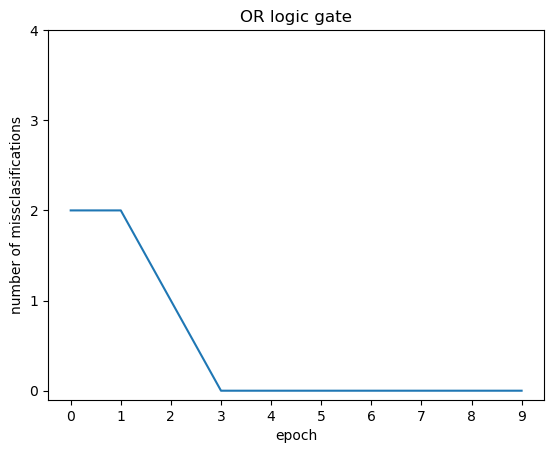

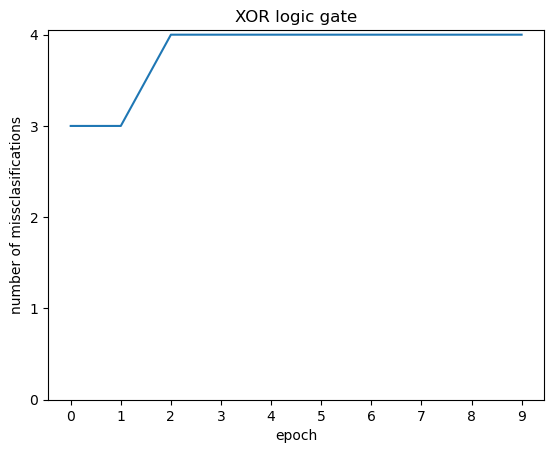

In [4]:
# THIS piece of code shows the error per epoch of the perceptron for each gate

for y_gate, title in zip([y_and_gate, y_or_gate, y_xor_gate], ["AND logic gate", "OR logic gate", "XOR logic gate"]):
    perceptron = Perceptron(learning_rate, n_epochs)
    gate_error = perceptron.train(X_gate, y_gate)
    plt.plot(gate_error)
    plt.xticks(np.arange(0, n_epochs, 1.0))
    plt.yticks(np.arange(0, 5, 1.0))
    plt.ylabel('number of missclasifications')
    plt.xlabel('epoch')
    plt.title(title)
    plt.show()

In [5]:
#load the data into numpy arrays

def vectorize_target(y, num_classes):
    """
    Local function to vectorize a specific target
    :param y: target to vectorize
    :return: vectorized target
    """
    v_y = np.zeros((num_classes, 1))
    v_y[y - 1] = 1.0
    return v_y

with open("../data/features.txt") as file:
    features = [np.array(list(map(float, line.strip('/n').split(',')))).reshape((10, 1)) for line in file]

with open("../data/targets.txt") as file:
    targets = [vectorize_target(int(line.rstrip('\n')), 7) for line in file]

with open("../data/unknown.txt") as file:
    unknown = [np.array(list(map(float, line.strip('/n').split(',')))).reshape((10, 1)) for line in file]


In [22]:
# split the data into train, test data 
train_data, test_data = split_dataset(features, targets, 0.2)
# train_data, validation_data = split_dataset(train_data[0], train_data[1], 0.2)

In [23]:
# # Create the network with one hidden layer
#     network = Network([10, 30, 7])
#     # set to the data to which we are learning to 'data' because we are testing
#     # it on the unknown dataset and start training
#     network.train(training_data, 35, 20, 0.07, validation_data)

#     accuracy = network.evaluate(test_data)
#     print(f"accuracy= {accuracy}")


In [38]:
# initialize the network with 10 features, 30 neurons in the hidden layer, 7 neurons in the output layer, learning rate of 0.15, squared loss function, batch size of 64
ann = ANN([10, 30, 7], lr = 0.09, loss_function="square", number_of_features = 10, batch_size=64)



In [39]:
# fit the network to the data with 30 epochs

features_train = []
targets_train = []

for i, j in train_data:
    features_train.append(np.array(i))
    targets_train.append(np.array(j))

ann.fit(features_train, targets_train, 35)


Epoch  1  done.
Score (accuracy) for this epoch =  0.2285031847133758
Epoch  2  done.
Score (accuracy) for this epoch =  0.2635350318471338
Epoch  3  done.
Score (accuracy) for this epoch =  0.24761146496815287
Epoch  4  done.
Score (accuracy) for this epoch =  0.3073248407643312
Epoch  5  done.
Score (accuracy) for this epoch =  0.4148089171974522
Epoch  6  done.
Score (accuracy) for this epoch =  0.464171974522293
Epoch  7  done.
Score (accuracy) for this epoch =  0.6011146496815286
Epoch  8  done.
Score (accuracy) for this epoch =  0.7157643312101911
Epoch  9  done.
Score (accuracy) for this epoch =  0.7484076433121019
Epoch  10  done.
Score (accuracy) for this epoch =  0.7579617834394905
Epoch  11  done.
Score (accuracy) for this epoch =  0.7834394904458599
Epoch  12  done.
Score (accuracy) for this epoch =  0.8359872611464968
Epoch  13  done.
Score (accuracy) for this epoch =  0.8304140127388535
Epoch  14  done.
Score (accuracy) for this epoch =  0.8646496815286624
Epoch  15  done

In [40]:
# evaluate the accuracy of the network on the test data

all = len(test_data)
corr = 0
for x, y in test_data:
    output = ann.forward_propagate(x)
    corr = corr + 1 if np.argmax(output) == np.argmax(y) else corr
accuracy = corr / all

print(f"accuracy= {accuracy}")


accuracy= 0.9082802547770701


In [ ]:
#generate predictions for the unknown data and save them to a file called 47_classes.txt coma separated in the data folder

predictions = []
for x in unknown:
    output = ann.forward_propagate(x)
    predictions.append(np.argmax(output))
    
with open("../data/47_classes.txt", "w") as file:
    for prediction in predictions:
        file.write(str(prediction) + ",")
    file.write(str(predictions[-1]))


In [14]:
kscore_7neurons =  kfold_cross_validation(np.array(features), np.array(targets), [10, 7, 7], learning_rate = 0.1, loss_function="square", k = 4, num_of_features = 10, batch_size=32)
kscore_16neurons =  kfold_cross_validation(np.array(features), np.array(targets), [10, 16, 7], learning_rate = 0.1, loss_function="square", k = 4, num_of_features = 10, batch_size=32)
kscore_30neurons =  kfold_cross_validation(np.array(features), np.array(targets), [10, 30, 7], learning_rate = 0.1, loss_function="square", k = 4, num_of_features = 10, batch_size=32)

cross-validation  1  /  4  step
 -  1  /  10  iterations.


C:\Users\Jakub\Desktop\CI\group-47\src\NeuralNetwork.py:250: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


Score:  0.8222109016811003
 -  2  /  10  iterations.
Score:  0.8629648497198166
 -  3  /  10  iterations.
Score:  0.8160978094752929
 -  4  /  10  iterations.
Score:  0.8711156393275599
 -  5  /  10  iterations.
Score:  0.6439123790117167
 -  6  /  10  iterations.
Score:  0.7733061640346408
 -  7  /  10  iterations.
Score:  0.44727457972491086
 -  8  /  10  iterations.
Score:  0.49210392256749874
 -  9  /  10  iterations.
Score:  0.31940906775343864
 -  10  /  10  iterations.
Score:  0.7371370351502802
cross-validation  2  /  4  step
 -  1  /  10  iterations.
Score:  0.7310239429444727
 -  2  /  10  iterations.
Score:  0.6245542536933265
 -  3  /  10  iterations.
Score:  0.8425878757004585
 -  4  /  10  iterations.
Score:  0.7921548650025472
 -  5  /  10  iterations.
Score:  0.5445746306673459
 -  6  /  10  iterations.
Score:  0.8512480896586857
 -  7  /  10  iterations.
Score:  0.7035150280183393
 -  8  /  10  iterations.
Score:  0.7432501273560876
 -  9  /  10  iterations.
Score:  0.

In [23]:
print("Scores with 7 neurons: ", kscore_7neurons)
print("Scores with 16 neurons: ", kscore_16neurons)
print("Scores with 30 neurons: ", kscore_30neurons)
scores = [kscore_7neurons, kscore_16neurons, kscore_30neurons]
neurons = ["7", "16", "30"]
cross_validation_score = []
for x in scores:
    temp = []
    for tab in x:
        avg1 = np.mean(tab)
        temp.append(avg1)
    cross_validation_score.append(np.mean(temp))
print("---")
print(cross_validation_score)

Scores with 7 neurons:  [[0.8222109016811003, 0.8629648497198166, 0.8160978094752929, 0.8711156393275599, 0.6439123790117167, 0.7733061640346408, 0.44727457972491086, 0.49210392256749874, 0.31940906775343864, 0.7371370351502802], [0.7310239429444727, 0.6245542536933265, 0.8425878757004585, 0.7921548650025472, 0.5445746306673459, 0.8512480896586857, 0.7035150280183393, 0.7432501273560876, 0.6586856851757514, 0.760570555272542], [0.6428935303107488, 0.6912888436067244, 0.39072847682119205, 0.8441161487519103, 0.7514009169638308, 0.7855323484462557, 0.5094243504839532, 0.8008150789607743, 0.6072338257768721, 0.7941925624044829], [0.7901171676006113, 0.6861946001018848, 0.7356087620988283, 0.5929699439633215, 0.8650025471217524, 0.5725929699439634, 0.6459500764136525, 0.608762098828324, 0.8273051451859399, 0.7814569536423841]]
Scores with 16 neurons:  [[0.9169638308711157, 0.9256240448293428, 0.8757004584819155, 0.8757004584819155, 0.891492613346918, 0.7131940906775344, 0.9062659195109526,

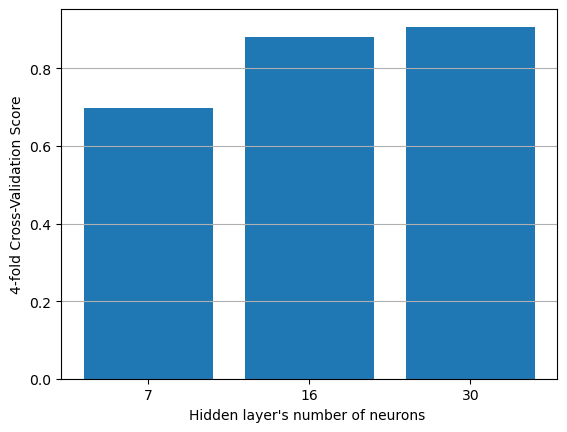

In [28]:
plt.bar(neurons, cross_validation_score)
plt.ylabel("4-fold Cross-Validation Score")
plt.xlabel("Hidden layer's number of neurons ")
plt.grid(axis = 'y')
plt.show()

In [6]:
# split the data into train, test and val data
train_data, test_data = split_dataset(features, targets, 0.2)
# train_data, validation_data = split_dataset(train_data[0], train_data[1], 0.2)

best_model = ANN([10, 30, 7], lr = 0.13, loss_function="square", number_of_features = 10, batch_size=64)

best_model.fit_train_val(train_data, test_data, 30)
val_score_by_epoch = best_model.epoch_score[0]
train_score_by_epoch = best_model.epoch_score[1]
epochs = np.arange(31)[1:]

Epoch  1  done.
Score (accuracy) for this epoch on train:  0.16677275620623808 , on validation:  0.1840764331210191
Epoch  2  done.
Score (accuracy) for this epoch on train:  0.45607893061744115 , on validation:  0.4484076433121019
Epoch  3  done.
Score (accuracy) for this epoch on train:  0.6761616804583068 , on validation:  0.6751592356687898
Epoch  4  done.
Score (accuracy) for this epoch on train:  0.7566836409929981 , on validation:  0.7681528662420383
Epoch  5  done.
Score (accuracy) for this epoch on train:  0.7783259070655634 , on validation:  0.7866242038216561
Epoch  6  done.
Score (accuracy) for this epoch on train:  0.84484404837683 , on validation:  0.8509554140127389
Epoch  7  done.
Score (accuracy) for this epoch on train:  0.8884468491406747 , on validation:  0.8904458598726115
Epoch  8  done.
Score (accuracy) for this epoch on train:  0.8854232972628899 , on validation:  0.8878980891719745
Epoch  9  done.
Score (accuracy) for this epoch on train:  0.9029280712921706 , 

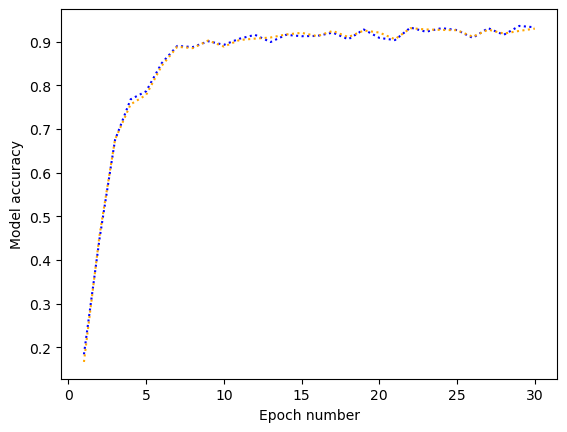

In [18]:
plt.plot(epochs, val_score_by_epoch, c="blue", ls=":")
plt.plot(epochs, train_score_by_epoch, c="orange", ls=":")
plt.xlabel("Epoch number")
plt.ylabel("Model accuracy")
plt.show()

In [15]:
print(epochs)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
